In [109]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from pathlib import Path
import os
import cv2
from torch.utils.data import DataLoader, Dataset
import random
from sklearn.model_selection import train_test_split

In [118]:
base_path = os.getcwd()
data_path = os.path.join(base_path, 'Massachusetts_roads_dataset', 'tiff')
train_data_path = os.path.join(data_path, 'train')
train_labels_path = os.path.join(data_path, 'train_labels')
test_data_path = os.path.join(data_path, 'test')
test_labels_path = os.path.join(data_path, 'test_labels')
val_data_path = os.path.join(data_path, 'val')
val_labels_path = os.path.join(data_path, 'val_labels')

train_data = glob(f'{train_data_path}\\*tiff')
test_data = glob(f'{test_data_path}\\*tiff')
val_data = glob(f'{val_data_path}\\*tiff')

train_label_data = glob(f'{train_labels_path}\\*tif')
test_label_data = glob(f'{test_labels_path}\\*tif')
val_label_data = glob(f'{val_labels_path}\\*tif')

data = train_data + test_data + val_data
labels = train_label_data + test_label_data + val_label_data

data = {'data_path': data, 'label_path': labels}
data = pd.DataFrame(data)

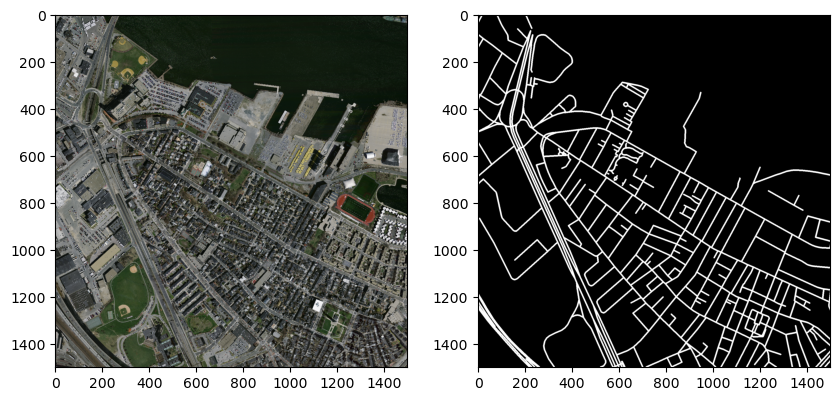

In [99]:
i = random.randint(0, len(data)-1)
#row = data.iloc[i]
img = cv2.cvtColor(cv2.imread(data.data_path[i]), cv2.COLOR_BGR2RGB)
label = cv2.cvtColor(cv2.imread(data.label_path[i]), cv2.COLOR_BGR2GRAY)

i, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

ax1.imshow(img)

ax2.imshow(label, cmap='gray')

In [119]:
train, test = train_test_split(data, random_state=42, shuffle=True, test_size=0.15)

In [121]:
class Custom_dataset(Dataset):
    def __init__(self,data, augmentation=False) -> None:

        self.data = data
        self.augmentation = augmentation

    def __len__(self):

        return len(self.data)
    
    def __getitem__(self, index):

        img = cv2.cvtColor(cv2.imread(data.data_path[index]), cv2.COLOR_BGR2RGB)
        label = cv2.cvtColor(cv2.imread(data.label_path[index]), cv2.COLOR_BGR2GRAY)
        label = np.expand_dims(label, axis=-1)

        if self.augmentation == True:
            pass

        image = torch.tensor(img, dtype=torch.float32).permute(2,0,1)/255
        label = torch.tensor(label, dtype=torch.float32).permute(2,0,1)/255


        return image, label
        


In [122]:
train = Custom_dataset(train)
test = Custom_dataset(test)

train_loaded = DataLoader(train, batch_size=8, shuffle=True)
test_loaded = DataLoader(test, batch_size=8, shuffle=False)

(<matplotlib.image.AxesImage at 0x2663d248070>,
 <matplotlib.image.AxesImage at 0x2663d260a00>)

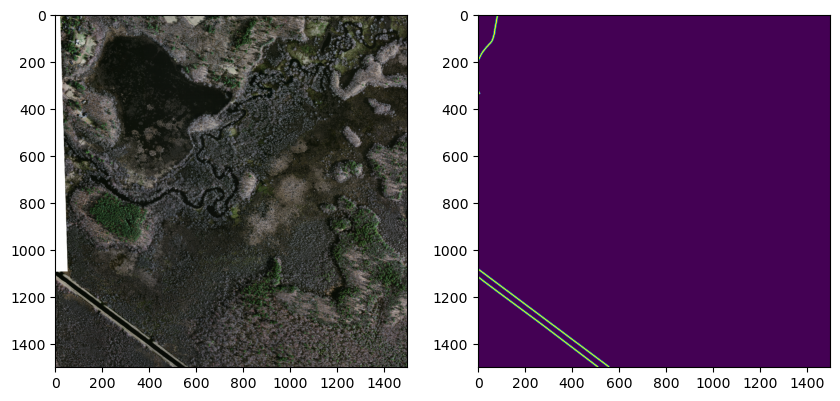

In [123]:
def plot_image(data:DataLoader):
    '''
    Both X and y should be a image like in a segmentation task
    imput: Takes in a Pytorch Dataloader and plot the train image and label image
    '''
    video, label = next(iter(train_loaded))
    video.shape, label.shape
    i, (ax1, ax2) = plt.subplots(1,2, figsize=(10,15))
    ax1.imshow(video.permute(0,2,3,1)[2]), ax2.imshow(label.permute(0,2,3,1)[2])